## Análisis computacional

Importamos las librerias mecesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

Algunas funciones para extraer conclusiones

In [3]:
def time_series_S1(key, name, direc, base, markI, markII, loc = 0, show = False):
    '''
    Representacion grafica de las series temporales del S1
    Para las tres configuraciones paramétricas
    '''
    
    base[key].iloc[loc:].plot(label = 'Base', xticks = [loc, 1000,  2000,  3000,  4000,5000])
    markI[key].iloc[loc:].plot(label = 'Mark 1', xticks = [loc, 1000,  2000,  3000,  4000,5000])
    markII[key].iloc[loc:].plot(label = 'Mark 2', xticks = [loc, 1000,  2000,  3000,  4000,5000])
    #plt.title(key + ' S1')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel(name)
    plt.xlim(xmin = loc)
    if show == True:
        plt.show()
    else:
        plt.savefig(direc + '/' + key.replace(" ", "") + 'S1.jpg', dpi = 500)
    plt.close()
    
def time_series_S2(key, name, direc, base, markI, markII, loc = 0, show = False):
    '''
    Representacion grafica para las series temporales del S2
    Para las tres configuraciones parametricas
    '''
    
    base[key].iloc[loc:].plot(label = 'Base', xticks = [loc, 1000,  2000,  3000,  4000,5000])
    markI[key].iloc[loc:].plot(label = 'Mark 1', xticks = [loc, 1000,  2000,  3000,  4000,5000])
    markII[key].iloc[loc:].plot(label = 'Mark 2', xticks = [loc, 1000,  2000,  3000,  4000,5000])
    #plt.title(key + ' S2')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel(name)
    plt.xlim(xmin = loc)
    if show == True:
        plt.show()
    else:
        plt.savefig(direc + '/' + key.replace(" ", "") + 'S2.jpg', dpi = 500)
    plt.close()
    
def save_tables(dataframes, file_names, directory):
    
    for e, n in zip(dataframes, file_names):
        
        descrip = e.describe(percentiles = [])
        
        with open(directory + '/' + n +'.tex','w') as tf:
            tf.write(descrip.to_latex())
    
def stats(file, keys, simunum):
    '''
    Extrae la ultima observacion de cada run
    '''
    data = {}
    ex_file = pd.ExcelFile(file)
    for key in keys:
        
        obs = []
        
        for e in range(0,simunum):
            
            df = pd.read_excel(ex_file, 'run' + str(e))
            obs.append(df[key].iloc[-1])
            
        data[key] = obs
        
    return pd.DataFrame(data)

def save_xls(list_dfs, xls_path):
    
    writer = pd.ExcelWriter(xls_path)
    for n, df in enumerate(list_dfs):
        df.to_excel(writer,'Sector%s' % (n+1))
    writer.save()
    writer.close()

In [4]:
IN = '/Users/jorgecasinosbuj/Google Drive/Investigación/Fatas y Almudi/Análisis computacional/Datos/DatosJulio'
OUT = '/Users/jorgecasinosbuj/Google Drive/Investigación/Fatas y Almudi/TFM/Tesis'

Leemos los datos

In [5]:
S1_base = pd.read_excel(IN + '/base.xlsx', sheet_name='Sector 1')
S2_base = pd.read_excel(IN + '/base.xlsx', sheet_name='Sector 2')
S1_markI = pd.read_excel(IN + '/markI_500.xlsx', sheet_name='Sector 1')
S2_markI = pd.read_excel(IN + '/markI_500.xlsx', sheet_name='Sector 2')
S1_markII = pd.read_excel(IN + '/markII_500.xlsx', sheet_name='Sector 1')
S2_markII = pd.read_excel(IN + '/markII_500.xlsx', sheet_name='Sector 2')

Creacion tablas de datos con las 500 observaciones finales

In [5]:
st_base_S1 = stats(IN + '/baseS1.xlsx', S1_base.columns.get_values() , 500)
st_base_S2 = stats(IN + '/baseS2.xlsx', S2_base.columns.get_values() , 500)
save_xls([st_base_S1, st_base_S2] ,IN + '/stats_base.xlsx')


In [6]:
st_markI_S1 = stats(IN + '/markI_500S1.xlsx', S1_base.columns.get_values() , 500)
st_markI_S2 = stats(IN + '/markI_500S2.xlsx', S2_base.columns.get_values() , 500)
save_xls([st_markI_S1, st_markI_S2] ,IN + '/stats_markI.xlsx')

In [7]:
st_markI_S1 = stats(IN + '/markII_500S1.xlsx', S1_base.columns.get_values() , 500)
st_markI_S2 = stats(IN + '/markII_500S2.xlsx', S2_base.columns.get_values() , 500)
save_xls([st_markI_S1, st_markI_S2] ,IN + '/stats_markII.xlsx')

In [8]:
stats_S1_base = pd.read_excel(IN + '/stats_base.xlsx', sheet_name = 'Sector1')
stats_S2_base = pd.read_excel(IN + '/stats_base.xlsx', sheet_name='Sector2')
stats_S1_markI = pd.read_excel(IN + '/stats_markI.xlsx', sheet_name = 'Sector1')
stats_S2_markII = pd.read_excel(IN + '/stats_markI.xlsx', sheet_name='Sector2')


Vamos a ver la información de la que disponemos

In [9]:
S1_base.head()

,Firm number,Herfindhal,Inflation,prices,r
0,1.000,10000.00000,NaN,0.03000,0.51352
1,1.436,7730.00000,-0.01064,0.02968,0.50938
2,1.712,7005.55556,0.02779,0.02554,0.51348
3,1.902,6639.72222,-0.10692,0.02039,0.51204
4,1.986,6645.20000,-0.11107,0.01678,0.51378


In [10]:
S2_base.head()

,Firm number,Herfindhal,Inflation,prices
0,1.000,10000.00000,NaN,0.53000
1,1.980,9799.19571,-0.12512,0.46369
2,2.976,9658.63003,0.07842,0.34416
3,3.970,9375.04378,-0.12565,0.25215
4,4.960,8986.04901,-0.19459,0.18203


Representamos las series temporales:

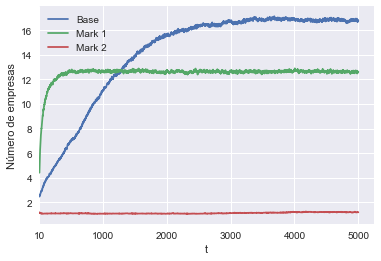

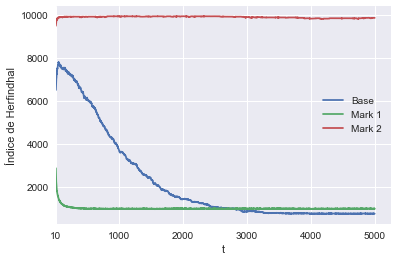

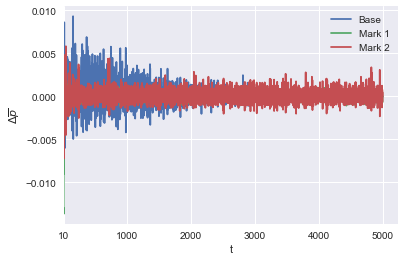

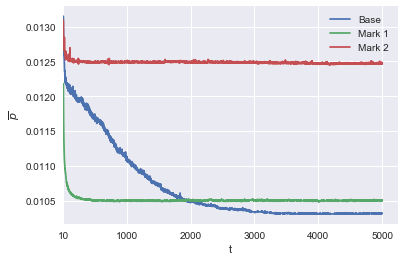

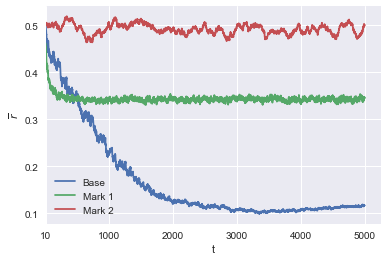

In [6]:
nombres = ['Número de empresas', 'Índice de Herfindhal', r'$\Delta \overline{p}$', r'$\overline{p}$', 
           r'$\overline{r}$']
for e, z in zip(S1_base.columns.get_values(), nombres):
    time_series_S1(e, z, OUT, S1_base, S1_markI, S1_markII, loc = 10, show = True)


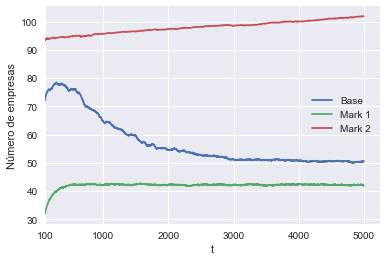

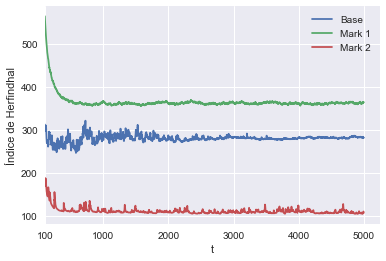

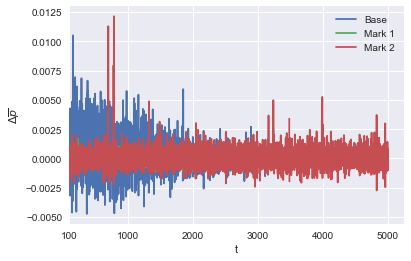

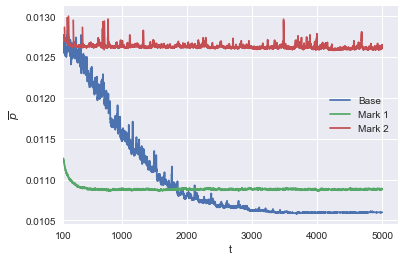

In [7]:
nombres2 = ['Número de empresas', 'Índice de Herfindhal', r'$\Delta \overline{p}$', r'$\overline{p}$']
for e,z in zip(S2_base.columns.get_values(), nombres2):
    time_series_S2(e, z, OUT, S2_base, S2_markI, S2_markII, loc = 100, show = True)

Representamos las series temporales del escenario **base**

In [13]:
keys = S1_base.columns.get_values()
names = ['Número de empresas', 'Índice de Herfindhal', 'Inflación', r'$\overline{p}$', r'$\overline{r}$']
loc1= 50
for e, y in zip(keys, names):
    S1_base[e][loc1:].plot(xticks = [loc1, 1000,  2000,  3000,  4000,5000])
    plt.xlim(xmin =loc1)
    plt.xlabel(r'$t$')
    plt.ylabel(y)
    plt.savefig(OUT + '/S1base' + e.replace(" ", "") +'.jpg', dpi = 500)
    plt.close()


In [14]:
keys2 = S2_base.columns.get_values()
names2 = ['Número de empresas', 'Índice de Herfindhal', 'Inflación', r'$\overline{p}$']
loc1 = 0
loc2 = 100
for e, y in zip(keys2, names2):
    if e == 'Firm number':
        S2_base[e].iloc[loc1:].plot(xticks = [loc1, 1000,  2000,  3000,  4000,5000])
    else:
        S2_base[e].iloc[loc2:].plot(xticks = [loc2, 1000,  2000,  3000,  4000,5000])
        plt.xlim(xmin = loc2)
    plt.xlabel(r'$t$')
    plt.ylabel(y)
    plt.savefig(OUT + '/S2base' + e.replace(" ", "") +'.jpg', dpi = 500)
    plt.close()



Estadísticos descriptivos de las 500 observaciones finales

In [16]:
baseS1 = pd.read_excel(IN + '/stats_base.xlsx', sheet_name='Sector1')
baseS2 = pd.read_excel(IN + '/stats_base.xlsx', sheet_name='Sector2')
markIS1 = pd.read_excel(IN + '/stats_markI.xlsx', sheet_name='Sector1')
markIS2 = pd.read_excel(IN + '/stats_markI.xlsx', sheet_name='Sector2')
markIIS1 = pd.read_excel(IN + '/stats_markII.xlsx', sheet_name='Sector1')
markIIS2 = pd.read_excel(IN + '/stats_markII.xlsx', sheet_name='Sector2')

Por comodidad exportamos estos estadísticos descriptivos a un fichero de excel

In [17]:
writer = pd.ExcelWriter(IN + '/descriptivos.xlsx')
dfs = [baseS1, baseS2, markIS1, markIS2, markIIS1, markIIS2]
keys = ['baseS1', 'baseS2', 'markIS1', 'markIS2', 'markIIS1', 'markIIS2']
for key, df in zip(keys, dfs):
    df.describe().round(4).to_excel(writer,key)
writer.save()
writer.close()

In [18]:
markIS1.describe()

,Firm number,Herfindhal,Inflation,prices,r
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,12.628000,979.808131,-0.000004,0.010504,0.345209
std,1.675479,146.299348,0.007486,0.000099,0.083926
min,8.000000,651.041670,-0.029410,0.010310,0.120520
25%,11.000000,874.074070,-0.004540,0.010430,0.288400
50%,13.000000,960.743800,-0.000075,0.010490,0.343515
75%,14.000000,1060.000460,0.004460,0.010560,0.397973
max,18.000000,1774.691360,0.025580,0.010880,0.673300


In [19]:
markIIS1.describe()

,Firm number,Herfindhal,Inflation,prices,r
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.200000,9855.209568,0.000753,0.012477,0.498961
std,1.587779,1136.875387,0.012671,0.000310,0.289267
min,1.000000,773.391020,-0.014500,0.010270,0.000130
25%,1.000000,10000.000000,0.000000,0.012500,0.239497
50%,1.000000,10000.000000,0.000000,0.012500,0.501530
75%,1.000000,10000.000000,0.000000,0.012500,0.747270
max,16.000000,10000.000000,0.200000,0.015000,0.998800


In [20]:
baseS2.describe()

,Firm number,Herfindhal,Inflation,prices
count,500.000000,500.000000,500.000000,500.000000
mean,50.560000,281.861635,-0.000172,0.010598
std,3.703219,31.829307,0.004478,0.000080
min,38.000000,201.628040,-0.014150,0.010400
25%,48.000000,261.076625,-0.002823,0.010540
50%,51.000000,277.501935,-0.000200,0.010590
75%,53.000000,298.861305,0.002410,0.010640
max,63.000000,481.953340,0.019260,0.010900


In [21]:
markIIS1.describe()

,Firm number,Herfindhal,Inflation,prices,r
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.200000,9855.209568,0.000753,0.012477,0.498961
std,1.587779,1136.875387,0.012671,0.000310,0.289267
min,1.000000,773.391020,-0.014500,0.010270,0.000130
25%,1.000000,10000.000000,0.000000,0.012500,0.239497
50%,1.000000,10000.000000,0.000000,0.012500,0.501530
75%,1.000000,10000.000000,0.000000,0.012500,0.747270
max,16.000000,10000.000000,0.200000,0.015000,0.998800


In [22]:
markIS2.describe()

,Firm number,Herfindhal,Inflation,prices
count,500.000000,500.000000,500.000000,500.000000
mean,41.948000,364.700786,0.000155,0.010884
std,3.613227,47.189796,0.008112,0.000135
min,32.000000,269.792220,-0.027650,0.010590
25%,39.000000,331.248810,-0.004445,0.010790
50%,42.000000,357.172740,0.000180,0.010870
75%,45.000000,390.823170,0.004950,0.010960
max,55.000000,609.334980,0.032390,0.011430


In [23]:
markIIS2.describe()

,Firm number,Herfindhal,Inflation,prices
count,500.000000,500.000000,500.000000,500.000000
mean,101.862000,106.860373,0.000787,0.012614
std,14.906353,58.404029,0.012978,0.000373
min,35.000000,70.049300,-0.044470,0.010590
25%,95.000000,89.889045,0.000000,0.012600
50%,95.000000,105.263170,0.000000,0.012620
75%,112.000000,105.263170,0.000000,0.012620
max,144.000000,1012.719200,0.200000,0.017480
